In [2]:
import pandas as pd
import datetime as datetime
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt

from db_utils import DataFrameInfo, DataTransform, Plotter, DataFrameTransform

*Loading in the data_file that has out dataframe*

In [ ]:
df = pd.read_csv('data_file.csv')
transformer = DataTransform()

In [ ]:
# Converting columns to a more appropriate format

df['issue_date'] = transformer.convert_to_datetime(df['issue_date'])
df['last_payment_date'] = transformer.convert_to_datetime(df['last_payment_date'] )
df['next_payment_date'] = transformer.convert_to_datetime(df['next_payment_date'])
df['last_credit_pull_date'] = transformer.convert_to_datetime(df['last_credit_pull_date'])

*Seeing how the data looks with the nulls via a matrix*

In [ ]:
instance = Plotter(df)
instance.null_plotter()

*Determining which columns should be dropped from the df based on visual analysis*

In [ ]:
#Dropping this column as it has a high percentage of NaN
df = df.drop('mths_since_last_record', axis=1)
#Dropping this column as it appears to have NMAR data as well as lots of it
df = df.drop('mths_since_last_major_derog', axis=1)
#''
df = df.drop('next_payment_date', axis=1)

In [ ]:
#Checking the shape of the columns with the NA's in order to choose the best imputation method

information = DataFrameInfo(df)
information.normality_check()

 *Filling in the NA's in the rows which weren't dropped*

In [ ]:
dataframetransformer = DataFrameTransform(df)

dataframetransformer.impute_null_values('funded_amount')
dataframetransformer.impute_null_values('term', imputation_method= 'mode')
dataframetransformer.impute_null_values('int_rate', imputation_method= 'mean')
dataframetransformer.impute_null_values('employment_length', imputation_method ='mode')
dataframetransformer.impute_null_values('mths_since_last_delinq')
dataframetransformer.impute_null_values('last_payment_date', imputation_method = 'mode')


plotter = Plotter(df)
plotter.null_plotter()

*Checking for skewness and treating it!*

In [ ]:
plotter.normality_check()
dataframetransformer.normalising_data()

*Checking how the normalised data looks like*

In [ ]:
normalised_data = pd.read_csv('normalized_data.csv')
normalised_plotter = Plotter(normalised_data)
normalised_plotter.visualize_data()

*Treating the data through removal of outliers*

In [3]:
normalised_data = pd.read_csv('normalized_data.csv')
columns_to_check = ['loan_amount_log', 'funded_amount_log','funded_amount_inv_log',
        'int_rate_log', 'instalment_log','annual_inc_log',
        'dti_log', 'delinq_2yrs_log', 'inq_last_6mths_log',
       'mths_since_last_delinq_log', 'open_accounts_log', 'total_accounts_log',
       'out_prncp_log', 'out_prncp_inv_log', 'total_payment_log',
       'total_payment_inv_log', 'total_rec_prncp_log', 'total_rec_int_log',
       'total_rec_late_fee_log', 'recoveries_log',
       'collection_recovery_fee_log', 'last_payment_amount_log',
       'collections_12_mths_ex_med_log']
outlier_removal = DataFrameTransform(normalised_data)
columns_for_duplicate_ids = outlier_removal.get_outliers(columns_to_check)


In [4]:
#Removing the outliers based on the above created inputs
outlier_removal.treating_outliers(columns_for_duplicate_ids)
filtered_dataframe  = outlier_removal.treating_outliers(columns_for_duplicate_ids)


The amount of rows removed is: 345. The total number of rows/IDs now is 53886
The amount of rows removed is: 345. The total number of rows/IDs now is 53886


In [ ]:
#Visualising the anomaly-filtered data
filtered_instance = Plotter(filtered_dataframe)
filtered_instance.visualise_data()

*Checking for correlation between the columns and removing the highly correlated columns

Correlation Matrix for All Columns:
                                Unnamed: 0        id  member_id  loan_amount  \
Unnamed: 0                        1.000000 -0.740437  -0.771003    -0.199699   
id                               -0.740437  1.000000   0.994167     0.131683   
member_id                        -0.771003  0.994167   1.000000     0.137246   
loan_amount                      -0.199699  0.131683   0.137246     1.000000   
funded_amount                    -0.209851  0.138468   0.144381     0.964726   
funded_amount_inv                -0.263591  0.165627   0.172942     0.975719   
int_rate                         -0.151331  0.055460   0.059961     0.204437   
instalment                       -0.216656  0.136035   0.142135     0.946666   
annual_inc                       -0.043710  0.041291   0.040914     0.367727   
dti                              -0.245394  0.198751   0.201059     0.091466   
delinq_2yrs                      -0.084721  0.063117   0.063444     0.015030   
inq_

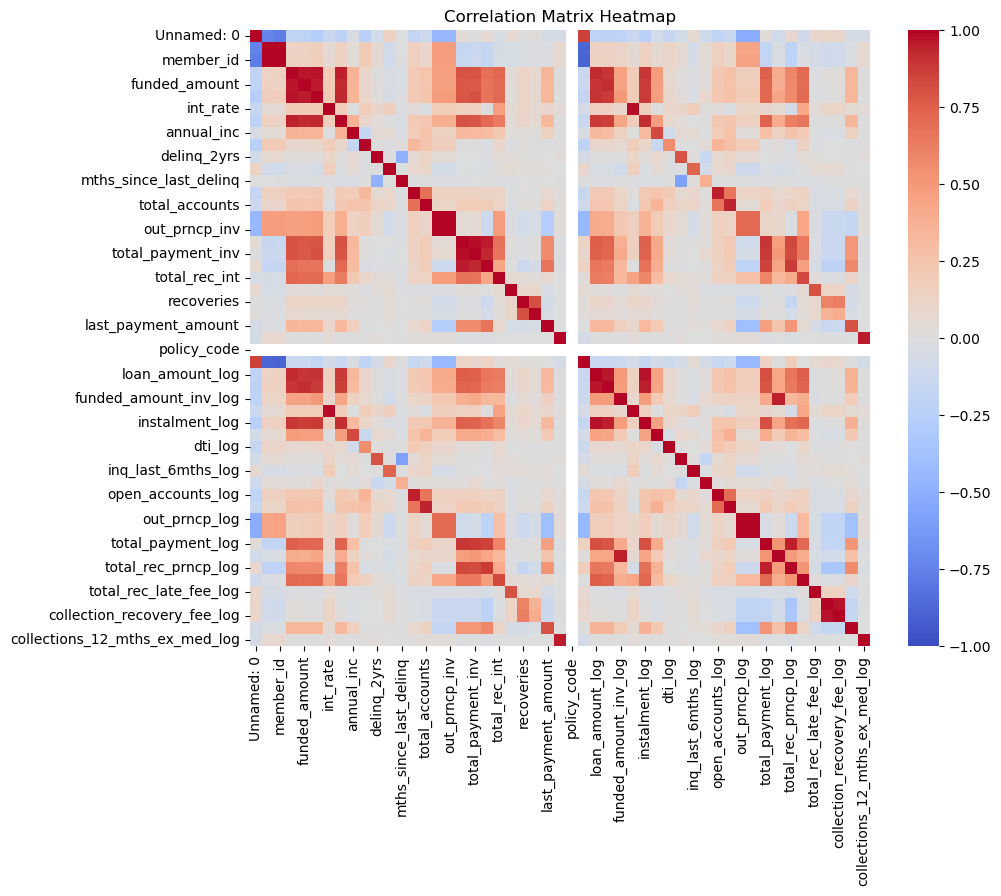

In [5]:
correlation_instance = DataFrameTransform(filtered_dataframe)
correlation_instance.correlation_matrix_analysis()
correlation_visual_instance = Plotter(filtered_dataframe)
correlation_visual_instance.visualise_correlation()
# You can have a look at the potential relationship and think about which columns to drop

In [8]:
filtered_dataframe.to_csv('filtered_dataframe.csv', index=False)